# Autoencoder

Les autoencoders permettent d'extraire les caracteristiques importantes de donnees, le principe est tres simple, on demande a un multilayer perceptron de reconstituer l'entree, en utilisant un encodeur puis un decodeur.

In [1]:
from __future__ import division, print_function, absolute_import
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [2]:
# Parametres
vitesse_apprentissage = 0.001
batch_size = 256
display_step = 1
examples_to_show = 10

# Parametres du reseau
n_hidden_1 = 512 # Neurones de la premiere couche
n_hidden_2 = 256 # Neurones de la secondes couche
n_input = 28*28

X = tf.placeholder("float", [None, n_input])

In [3]:
def generate_weights(x, y):
    return tf.Variable(tf.truncated_normal([x, y], stddev=1./x))

def generate_bias(x):
    return tf.Variable(tf.truncated_normal([x], stddev=1./x))

In [4]:
encoder_W1 = generate_weights(n_input, n_hidden_1)
encoder_W2 = generate_weights(n_hidden_1, n_hidden_2)
decoder_W1 = generate_weights(n_hidden_2, n_hidden_1)
decoder_W2 = generate_weights(n_hidden_1, n_input)

encoder_b1 = generate_bias(n_hidden_1)
encoder_b2 = generate_bias(n_hidden_2)
decoder_b1 = generate_bias(n_hidden_1)
decoder_b2 = generate_bias(n_input)


Comme il s'agit d'un multilayer perceptron que nous avons deja vu, je ne commente pas cette section, vous voyez seulement l'initialisation des poids et bias de chaque couche.

In [5]:
def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.matmul(x, encoder_W1) + encoder_b1)
    layer_2 = tf.nn.sigmoid(tf.matmul(layer_1, encoder_W2) + encoder_b2)
    return layer_2

def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.matmul(x, decoder_W1) + decoder_b1)
    layer_2 = tf.nn.sigmoid(tf.matmul(layer_1, decoder_W2) + decoder_b2)
    return layer_2

![autoencoder](http://nghiaho.com/wp-content/uploads/2012/12/autoencoder_network1.png)

In [6]:
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

y_pred = decoder_op

cout = tf.reduce_mean(tf.pow(X - y_pred, 2))
optimizer = tf.train.AdamOptimizer(vitesse_apprentissage).minimize(cout)

Le code ci-dessus ne devrait pas vous surprendre, vous noterez que j'ai choisi un autre algorithme d'optimisation car il est plus rapide, l'ancien algorithme fonctionnerait egalement, vous pouvez d'ailleurs l'essayer et voir les differences de performances. La fonction de cout est differente egalement, on compare pixel par pixel et on eleve au carre pour se debarasser du signe.

In [7]:
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(20):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cout], feed_dict={X: batch_xs})
    
    print("Iteration:", '%04d' % (epoch+1),
              "cout =", "{:.9f}".format(c))

Iteration: 0001 cout = 0.064544253
Iteration: 0002 cout = 0.063724108
Iteration: 0003 cout = 0.063213646
Iteration: 0004 cout = 0.059210449
Iteration: 0005 cout = 0.051766608
Iteration: 0006 cout = 0.045903534
Iteration: 0007 cout = 0.034541991
Iteration: 0008 cout = 0.029489635
Iteration: 0009 cout = 0.025136052
Iteration: 0010 cout = 0.020402586
Iteration: 0011 cout = 0.018321678
Iteration: 0012 cout = 0.017198402
Iteration: 0013 cout = 0.014703293
Iteration: 0014 cout = 0.014012448
Iteration: 0015 cout = 0.011536312
Iteration: 0016 cout = 0.011382006
Iteration: 0017 cout = 0.011140757
Iteration: 0018 cout = 0.010074977
Iteration: 0019 cout = 0.009598386
Iteration: 0020 cout = 0.008981673


D:\Users\yamas\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


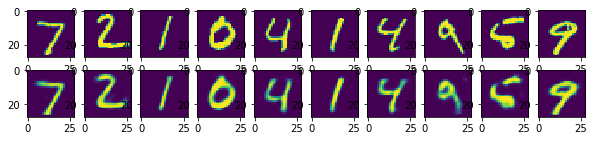

In [8]:
# Applying encode and decode over test set
encode_decode = sess.run(
    y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))

f.show()
plt.show()